In [51]:
#!python -m pip install git+https://github.com/fastai/fastai.git

#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df1 = pd.read_csv('banknifty_train_csv.csv')
df2 = pd.read_csv('banknifty_test_csv.csv')
df_frame = [df1,df2]
df = pd.concat(df_frame)
#print the head
df.tail()

,Date,Open,High,Low,Close,Volume,Turnover
16,2018-10-25,24841.50,24977.35,24696.85,24817.45,215033794.0,6.855910e+10
17,2018-10-26,24771.85,24771.95,24353.10,24421.05,219130974.0,5.370590e+10
18,2018-10-29,24647.95,25023.75,24404.55,24959.70,279844102.0,8.145830e+10
19,2018-10-30,24924.75,25121.50,24686.85,24807.75,257591034.0,6.320860e+10
20,2018-10-31,24823.80,25201.30,24528.35,25153.25,241789641.0,6.831520e+10


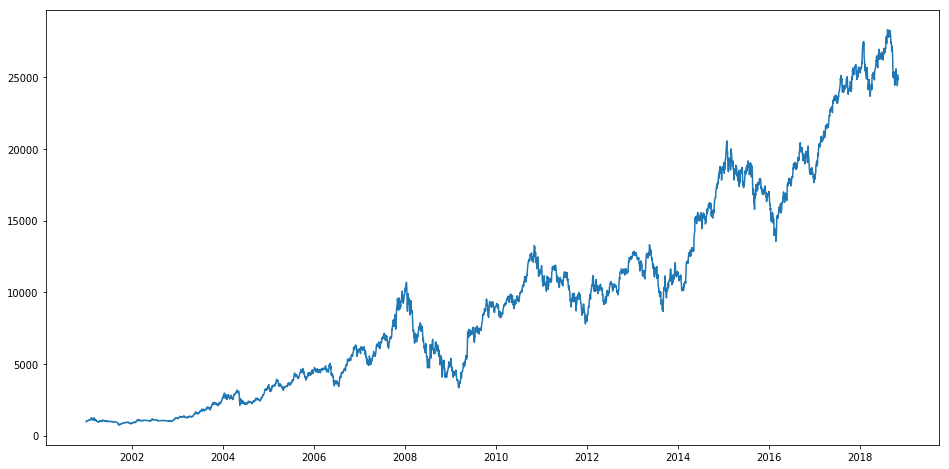

In [52]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [53]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [54]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
#splitting into train and validation
upto =len(new_data)-248

print(upto)
train = new_data[:upto]
valid = new_data[upto:]

4191


In [55]:
new_data.shape, train.shape, valid.shape

((4439, 1), (4191, 1), (248, 1))

In [56]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [57]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM






In [58]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [59]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
upto =len(new_data)-248
print(upto)
train = dataset[0:upto,:]
valid = dataset[upto:,:]

4191


In [60]:
#converting dataset into x_train and y_train
no_of_days =90
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
#scaled_data =dataset
x_train, y_train = [], []
for i in range(60,len(train)-no_of_days):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i+no_of_days-1,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [61]:
one =np.reshape(x_train, (x_train.shape[0],x_train.shape[1]))
print(one.shape)
test_df = pd.DataFrame(one)
test_df["y"] = y_train
print(test_df.iloc[:,[0,58,59,60]])
print(scaled_data[149,0])

(4041, 60)
             0        58        59         y
0     0.008494  0.010451  0.010274  0.008138
1     0.009867  0.010274  0.010710  0.008077
2     0.010880  0.010710  0.010777  0.007976
3     0.010551  0.010777  0.008986  0.007472
4     0.010998  0.008986  0.007853  0.007217
5     0.010526  0.007853  0.008223  0.007620
6     0.010307  0.008223  0.008208  0.007971
7     0.010428  0.008208  0.008149  0.008392
8     0.010447  0.008149  0.008386  0.008107
9     0.011090  0.008386  0.007989  0.008209
10    0.011380  0.007989  0.008483  0.008002
11    0.011760  0.008483  0.007965  0.007660
12    0.011379  0.007965  0.008785  0.007592
13    0.011279  0.008785  0.009943  0.007632
14    0.011785  0.009943  0.010879  0.007629
15    0.011952  0.010879  0.011170  0.007284
16    0.012632  0.011170  0.010727  0.007347
17    0.012691  0.010727  0.010777  0.007057
18    0.013683  0.010777  0.010653  0.007103
19    0.012408  0.010653  0.010641  0.007132
20    0.012678  0.010641  0.010753  0.006668

In [62]:
inputs = new_data[len(new_data) - len(valid) -60:].values
inputs = inputs.reshape(-1,1)
print()
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test
two =np.reshape(X_test, (X_test.shape[0],X_test.shape[1]))
test_df1 = pd.DataFrame(two)
print(test_df1.iloc[:,[0,58,59]])


          0        58       59
0      24675  24988.5  25019.3
1    24827.5  25019.3  25490.5
2    24906.3  25490.5  25427.3
3    24599.5  25427.3  25650.7
4    24374.6  25650.7  25571.2
5    24217.3  25571.2  25300.8
6    23985.8  25300.8  25184.3
7    24115.8  25184.3  25291.3
8    24437.7  25291.3    25499
9    24237.2    25499  25358.3
10   24074.5  25358.3  25284.6
11   23936.5  25284.6  25218.9
12   23974.5  25218.9  25446.6
13   24316.8  25446.6  25728.4
14   24274.2  25728.4  25768.6
15   24377.1  25768.6  25757.5
16     24129  25757.5  25766.7
17   24308.7  25766.7  25736.2
18   24318.4  25736.2  25779.7
19     24434  25779.7    25892
20   24236.8    25892  25846.4
21   24328.3  25846.4  25795.7
22   24279.2  25795.7  25332.4
23   24304.9  25332.4    25192
24   24370.8    25192  25075.1
25   24672.2  25075.1  25124.8
26   24784.7  25124.8  24851.8
27   24831.8  24851.8  25057.2
28   24912.2  25057.2  25321.2
29   24844.3  25321.2  25404.8
..       ...      ...      ...
218  26

In [63]:
len(new_data) - len(valid) - 60

4131

In [64]:
new_data.iloc[[4131,4190]]

,Close
Date,
2017-08-03,24675
2017-10-31,25019.3


In [65]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) -60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 1166s - loss: 0.0046


In [66]:
closing_price

array([[25721.277],
       [25869.77 ],
       [25998.625],
       [26140.541],
       [26245.254],
       [26270.791],
       [26244.414],
       [26222.342],
       [26240.47 ],
       [26242.537],
       [26227.928],
       [26198.498],
       [26210.086],
       [26282.31 ],
       [26369.08 ],
       [26445.191],
       [26506.373],
       [26545.604],
       [26577.805],
       [26620.994],
       [26650.957],
       [26662.654],
       [26582.625],
       [26463.035],
       [26328.033],
       [26219.97 ],
       [26090.283],
       [26015.95 ],
       [26019.23 ],
       [26063.688],
       [26066.195],
       [26034.727],
       [26026.791],
       [26074.854],
       [26160.21 ],
       [26265.943],
       [26337.875],
       [26380.254],
       [26421.066],
       [26457.121],
       [26452.572],
       [26435.043],
       [26423.812],
       [26376.06 ],
       [26329.752],
       [26287.309],
       [26279.787],
       [26309.79 ],
       [26360.89 ],
       [26415.898],


In [67]:
len(valid)

248

In [68]:

valid = new_data[upto:]
val =len(new_data[upto:])
#valid = new_data[upto+3:]
#valid = valid.iloc[no_of_days:val+1]
print(valid.shape)
print(closing_price[:len(closing_price)-no_of_days].shape)
valid['Predictions'] =0
#valid['Predictions'] = closing_price[:len(closing_price)-no_of_days]
valid['Predictions'] = closing_price
#print(valid.shape)
valid
      

(248, 1)
(158, 1)


/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Close,Predictions
Date,,
2017-11-01,25490.5,25721.277344
2017-11-02,25427.3,25869.769531
2017-11-03,25650.7,25998.625000
2017-11-06,25571.2,26140.541016
2017-11-07,25300.8,26245.253906
2017-11-08,25184.3,26270.791016
2017-11-09,25291.3,26244.414062
2017-11-10,25499,26222.341797
2017-11-13,25358.3,26240.470703


In [69]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(valid['Predictions'])),2)))
rms

929.0326763003616

In [70]:
valid.columns



Index(['Close', 'Predictions'], dtype='object')

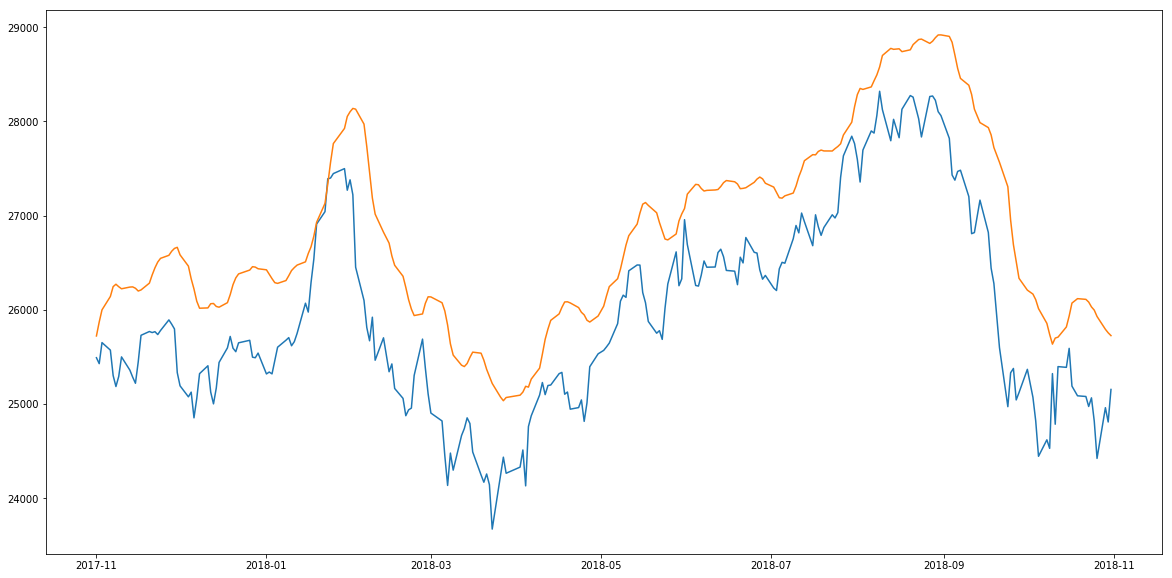

In [72]:
#for plotting
#dataset = new_data.values
#upto =len(new_data)-248
#print(upto)
#train = new_data[:upto]
#valid = new_data[upto:]

#plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


In [73]:
from keras.models import model_from_json
import os
symbol = "BANKNIFTY_90"

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(symbol+".h5")
print("Saved model to disk")


Saved model to disk
